# Desafio 1

### Importacion de librerias y base de datos

In [570]:
import numpy as np
import pandas as pd

In [571]:
data_location = "../Data/properati.csv"
data = pd.read_csv(data_location, sep=",")
print(data.shape)
data.sample()

(121220, 26)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
105671,105671,sell,house,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,NaN,NaN,...,171.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1bv2c_venta_casa_la-plata_mirta-libera-propiedades_gok,"VENTA - CASA/ LOCAL/ TERRENO - LA PLATA - Calle 07 71 y 72.Apto emprendimiento/desarrolloSobre avenida 7, buen lote de 8,66 x 34,54, con 171m2 cubiertos a refaccionar. Posee al frente local comercial de 5 x 7 con doble vidriera, cortina de enrollar y baño. La casa tiene entrada por pasillo lateral, es de estilo chorizo con todos los ambientes en hilera que dan a una galería.",Terreno - La Plata,https://thumbs4.properati.com/4/7OzlQPOuG-pR8SYyAoI4syqnCuo=/trim/198x0/smart/filters:strip_icc()/tbcn.s3-accelerate.amazonaws.com/water_pics/42520786403820870433167466765125523632727550518974342286557314857921714581149.jpg


Limpieza y ordenamiento de las columnas "floor" y "rooms" basados en el tipo de propiedad y la exploracion de los campos "description" y "title"

In [572]:
dataFiltrada = data.loc[:, ['property_type', 'floor', 'rooms', 'description', 'title']]
dataFiltrada['description'] = dataFiltrada['description'].str.lower()
dataFiltrada['title'] = dataFiltrada['title'].str.lower()
dataFiltrada.sample()
display(dataFiltrada.sample(5))
dataFiltrada.dtypes

,property_type,floor,rooms,description,title
114422,house,NaN,NaN,"casa en venta de estilo racionalista. con puerta de roble antigua reciclada. dos entradas de servicio. - seguridad 24 hs.- cochera para dos autos- revestimientos en baños y cocina con venecitas ""murvi""- griferias fv- sanitarios roca- revestimientos exterior en tarquini- pisos de porcelanato ""ilva""- calefacción por piso radiante, con caldera dual italiana""baxi"".- 3 aires acondicionados ""elektra""- gran jardín parquizado e iluminado - 2 dormitorio en planta alta, 1 principal en suite con vestidor- cocina grande bien equipada e incorporada al comedor- lavadero- dependencia de serv. o cuarto de herramientasmatriculado:julio mallmanncmcpsi 5965",casa en venta en pilar - altos del golf
84794,apartment,NaN,NaN,"grupo mgmvende excelente 2 ambientes y 1/2 en vareseexcelente unidad, tanto por ubicacion, distribuccion y altura.mucha luz y grandes vistas a la ciudadcochera cubiertano dude en consultar.mart. y corr. público fabiana orfanelli - reg. nº3543 -grupo mgm desarrollos inmobiliarios",excelente 2 ambientes y 1/2 en varese
3072,house,NaN,4.0,"venta de casa 5 ambientes en ituzaingó ,excelente chalet de categoria ubicado en la mejor zona de ituzaingo , jardin al frente cochera para dos autos, living con hogar ,cocina-comedor amplio , baño completo , un dormitorio con placard, galeria , lavadero , amplisimo parque , planta alta 3 dormitorios baño completo, espaciosos ambientes , posible escritorio ,excelente condiciones constructivas, consulte se escuchan propuestas.-información adicional: tipo de techo: teja francesa",u$d 240.000 - casa en venta - atacama 1100
61072,store,NaN,NaN,"locallocal en venta, villa crespo!excelente ubicación, sobre av. scalabrini ortiz frente a parada de colectivos y a 2 cuadras de av. corrientes!local en 3 plantas, 195m2 totales!!!pb: 74m2 / 1º piso 81m2 / sotano 40m2.pb: planta de 3,2 x 18 que luego se ensancha a 5,2 con 2 baños independientes y cómoda escalera que distribuye a 1º piso y sotano.1º piso: planta de 17,7 x 5,3 con algunas divisiones en material y durlock y dos oficinas de 2,5 x 2,3 y 4,2 x 2,6. frente vidriado con persiana eléctrica.sotano: planta libre de 7,5 x 5,3 completamente utilizable.amplias posibilidades de refacción y modificación!ideal inversor!sucursal v. crespo ()sucursal almagro () deja constancia que los m2 indicados son aproximados, al igual que las medidas parciales de los ambientes, y el valor consignado de expensas mensuales está sujeto a verificación y/o ajustes. fotos de carácter no contractual."" - - ebertolotti",local en venta
47469,house,NaN,NaN,"impecable residencia de estilo francã©s s/ 4630 m2 lote con salida a lã­ndisima calle cortada elortondo y a libertador, refaccionada en varias etapas manteniendo sus materiales originales. 867 m2 cubiertos y 69 m2 semicubiertos desarrollada en 3 plantas. en planta baja: hall, amplio living y comedor, estar con hogar, toilette, cocina con antecocina y comedor diario, dependencia de servicio, mã¡s 2 cuartos de servicio. 1er planta: 4 dormitorios en suite. 2da planta: 1 dormitorio en suite y altillo 35 m2, pisos de roble y caldã©n, ascensor. calefacciã³n central frã­o-calor. exterior : parque con distintas especies arboreas, pileta revestida, riego por aspersiã³n. detalles: excelente carpinterã­a, herrajes en bronce labrado, cocina y baã±os refaccionados, molduras de techos originales. casa de similar diseã±o destinada a casa de huã©spedes compuesta por 6 ambientes, garage doble, vigilancia.*apta varios destinos*","casa 4630m² con teléfono en elortondo 1800, san isidro, beccar, por u$s 3.500.000"


property_type     object
floor            float64
rooms            float64
description       object
title             object
dtype: object

Las variables tienen el tipo correcto de datos para el analisis.
Chequeo nulos en el campo "property_type" y valores

In [573]:
print(dataFiltrada.property_type.value_counts())
print(dataFiltrada.property_type.isnull().sum())

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64
0


Nuevas columnas que son copia de las originales rooms_clean y floor_clean

In [574]:
dataFiltrada['rooms_clean'] = dataFiltrada['rooms']
dataFiltrada['floor_clean'] = dataFiltrada['floor']

In [575]:
dataFiltrada.sample()

,property_type,floor,rooms,description,title,rooms_clean,floor_clean
10096,house,NaN,NaN,"se vende casa en calle tucuman al 300, barrio arquitectura. 2 dormitorios, baño, cocina, living, comedor, lavadero, garage y espacio verde.",se vende casa en calle tucuman al 300,NaN,NaN


Los tipos de propiedad no tienen valores nulos y estan organizados en 4 categorias, se infiere que la seleccion de este campo es a traves de una lista definida. Esto nos permite organizar el dataframe por el campo de tipo de propiedad si es necesario.

### Tratamiento de rooms

In [576]:
import re

In [577]:
numeroAmbientesPattern = '(?P<numero>\d{1})\s?(ambientes|amb)'
regexAmbientes = re.compile(numeroAmbientesPattern)

In [578]:
descriptionObject = dataFiltrada.description
ambientesMatches = descriptionObject.apply(lambda x: x if x is np.NaN else regexAmbientes.search(x))


In [579]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask = dataFiltrada.rooms_clean.isnull() & ambientesMatches.notnull()



73830


In [580]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask, 'rooms_clean'] = ambientesMatches[roomsAmbientesMask].apply(lambda x: float(x.group("numero")))

print(dataFiltrada.rooms_clean.isnull().sum())



73830
54769


Mismo regex sobre columna Title

In [581]:
#numeroAmbientesPattern = '(?P<numero>\d{1})\s?(ambientes|amb)'
#regexAmbientes = re.compile(numeroAmbientesPattern)

In [582]:
titleObject = dataFiltrada.title
ambientesMatches2 = titleObject.apply(lambda x: x if x is np.NaN else regexAmbientes.search(x))


In [583]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask2 = dataFiltrada.rooms_clean.isnull() & ambientesMatches2.notnull()



54769


In [584]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask2, 'rooms_clean'] = ambientesMatches2[roomsAmbientesMask2].apply(lambda x: float(x.group("numero")))

print(dataFiltrada.rooms_clean.isnull().sum())



54769
52131


Segundo criterio de regex para los ambientes

In [585]:
def pasarANumero (x):
    numeroStr = x.group("numeroPalabra")
    dictAmbientes = {'cero':0, 'uno':1, 'dos':2, 'tres':3, 'cuatro':4, 'cinco': 5, 'seis': 6, 'seís':6, 'siete': 7, 'ocho': 8, 'nueve': 9}
    resultado = dictAmbientes[numeroStr]
    return resultado

    

In [586]:
numeroAmbientesPattern2 = '(?P<numeroPalabra>dos|tres|cuatro|cinco|seis|siete|ocho)\s?(ambientes|amb)'
regexAmbientes2 = re.compile(numeroAmbientesPattern2)

In [587]:
#descriptionObject = dataFiltrada.description
ambientesMatches3 = descriptionObject.apply(lambda x: x if x is np.NaN else regexAmbientes2.search(x))


In [588]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask3 = dataFiltrada.rooms_clean.isnull() & ambientesMatches3.notnull()

print(ambientesMatches3[8].group('numeroPalabra'))

52131
dos


In [589]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask3, 'rooms_clean'] = ambientesMatches3[roomsAmbientesMask3].apply(pasarANumero)

print(dataFiltrada.rooms_clean.isnull().sum())



52131
50195


Ahora sobre title con el regex 2 de ambientes

In [590]:
titleObject = dataFiltrada.title
ambientesMatches4 = titleObject.apply(lambda x: x if x is np.NaN else regexAmbientes2.search(x))


In [591]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask4 = dataFiltrada.rooms_clean.isnull() & ambientesMatches4.notnull()


50195


In [592]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask4, 'rooms_clean'] = ambientesMatches4[roomsAmbientesMask4].apply(pasarANumero)

print(dataFiltrada.rooms_clean.isnull().sum())



50195
49928


Ahora aplicamos un tercer regex en busqueda de dormitorios para completar los faltantes de ambientes.

In [593]:
numeroAmbientesPattern3 = '(?P<numeroPalabra>dos|tres|cuatro|cinco|seis|siete|ocho)\s?(dormitorios|dorm|cuartos|hab|habitaciones)'
regexAmbientes3 = re.compile(numeroAmbientesPattern3)




In [594]:
def pasarANumeroDormi (x):
    numeroStr = x.group("numeroPalabra")
    dictAmbientes = {'cero':0, 'un':1, 'dos':2, 'tres':3, 'cuatro':4, 'cinco': 5, 'seis': 6, 'seís':6, 'siete': 7, 'ocho': 8, 'nueve': 9}
    resultado = dictAmbientes[numeroStr] + 1
    return resultado

In [595]:
descriptionObject = dataFiltrada.description
ambientesMatches5 = descriptionObject.apply(lambda x: x if x is np.NaN else regexAmbientes3.search(x))


In [596]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask5 = dataFiltrada.rooms_clean.isnull() & ambientesMatches5.notnull()

print(ambientesMatches5[5].group('numeroPalabra'))

49928
dos


In [597]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask5, 'rooms_clean'] = ambientesMatches5[roomsAmbientesMask5].apply(pasarANumeroDormi)

print(dataFiltrada.rooms_clean.isnull().sum())



49928
39864


Tercer regex sobre title

In [598]:

ambientesMatches6 = titleObject.apply(lambda x: x if x is np.NaN else regexAmbientes3.search(x))


In [599]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask6 = dataFiltrada.rooms_clean.isnull() & ambientesMatches6.notnull()

print(ambientesMatches6[5].group('numeroPalabra'))

39864
dos


In [600]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask6, 'rooms_clean'] = ambientesMatches6[roomsAmbientesMask6].apply(pasarANumeroDormi)

print(dataFiltrada.rooms_clean.isnull().sum())



39864
39762


Aplicamos el regex 4 para detectar numero de dormitorios en description

In [601]:
numeroAmbientesPattern4 = '(?P<numero>\d{1})\s?(dormitorios|dorm|cuartos|hab|habitaciones)'
regexAmbientes4 = re.compile(numeroAmbientesPattern4)



In [602]:

ambientesMatches7 = descriptionObject.apply(lambda x: x if x is np.NaN else regexAmbientes4.search(x))


In [603]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask7 = dataFiltrada.rooms_clean.isnull() & ambientesMatches7.notnull()

print(ambientesMatches7[4].group('numero'))

39762
1


In [604]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask7, 'rooms_clean'] = ambientesMatches7[roomsAmbientesMask7].apply(lambda x: float(x.group("numero")) + 1)

print(dataFiltrada.rooms_clean.isnull().sum())



39762
21391


Cuarto regex sobre title

In [605]:

ambientesMatches8 = titleObject.apply(lambda x: x if x is np.NaN else regexAmbientes4.search(x))


In [606]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask8 = dataFiltrada.rooms_clean.isnull() & ambientesMatches8.notnull()

print(ambientesMatches8[1].group('numero'))

21391
2


In [607]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask8, 'rooms_clean'] = ambientesMatches8[roomsAmbientesMask8].apply(lambda x: float(x.group("numero")) + 1)

print(dataFiltrada.rooms_clean.isnull().sum())



21391
20906


Quinto regex para detectar monoambientes sobre description. "un/1 ambiente"

In [608]:
numeroAmbientesPattern5 = '(?P<numeroPalabra>un|1|mono)\s?(ambientes|amb)'
regexAmbientes5 = re.compile(numeroAmbientesPattern5)

In [609]:

ambientesMatches8 = descriptionObject.apply(lambda x: x if x is np.NaN else regexAmbientes5.search(x))


In [610]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask8 = dataFiltrada.rooms_clean.isnull() & ambientesMatches8.notnull()

print(ambientesMatches8[7].group('numeroPalabra'))

20906
mono


In [611]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask8, 'rooms_clean'] = ambientesMatches8[roomsAmbientesMask8].apply(lambda x: float(1.0))

print(dataFiltrada.rooms_clean.isnull().sum())



20906
17436


In [612]:

ambientesMatches9 = titleObject.apply(lambda x: x if x is np.NaN else regexAmbientes5.search(x))


In [613]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask9 = dataFiltrada.rooms_clean.isnull() & ambientesMatches9.notnull()

print(ambientesMatches9[7].group('numeroPalabra'))

17436
mono


In [614]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask9, 'rooms_clean'] = ambientesMatches9[roomsAmbientesMask9].apply(lambda x: float(1.0))

print(dataFiltrada.rooms_clean.isnull().sum())



17436
17259


Regex numero 6 para detectar un dormitorio

In [615]:
numeroAmbientesPattern6 = '(?P<numeroPalabra>un|1)\s?(cuarto|dormi|hab)'
regexAmbientes6 = re.compile(numeroAmbientesPattern6)

In [616]:

ambientesMatches10 = descriptionObject.apply(lambda x: x if x is np.NaN else regexAmbientes6.search(x))


In [617]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask10 = dataFiltrada.rooms_clean.isnull() & ambientesMatches10.notnull()

print(ambientesMatches10[4].group('numeroPalabra'))

17259
1


In [618]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask10, 'rooms_clean'] = ambientesMatches10[roomsAmbientesMask10].apply(lambda x: float(1.0)+1)

print(dataFiltrada.rooms_clean.isnull().sum())



17259
15759


In [619]:

ambientesMatches11 = titleObject.apply(lambda x: x if x is np.NaN else regexAmbientes6.search(x))


In [620]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask11 = dataFiltrada.rooms_clean.isnull() & ambientesMatches11.notnull()



15759


In [621]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask11, 'rooms_clean'] = ambientesMatches11[roomsAmbientesMask11].apply(lambda x: float(1.0)+1)

print(dataFiltrada.rooms_clean.isnull().sum())



15759
15729


In [622]:
pd.options.display.max_colwidth = 1000
print(dataFiltrada.rooms.isnull().sum())
print(dataFiltrada.rooms_clean.isnull().sum())
postAmbientesRegexMask = dataFiltrada.rooms_clean.isnull()
dataFiltrada.loc[postAmbientesRegexMask,['description', 'title']]

73830
15729


,description,title
27,"estancias propone vivir rodeados de naturaleza y verde. por este motivo se destinó el 50% del emprendimiento a espacios comunes con una parquización diseñada por el estudio thays. además de reservar algunos espacios en su estado natural para garantizar una mejor calidad de vida. la ribera del río luján y el bosque natural de acacias le permiten a los habitantes de estancias tener un contacto diario con la naturaleza en su estado puro. donde la mano del hombre solo ha intervenido para asegurar su conservación. barrio la pioneraen cumplimiento de la ley 2340 cucicba, ley 10.973 de la prov.bs.as., ley nacional 25.028, ley 22.802 de lealtad comercial, ley 24.240 de defensa al consumidor, las normas del código civil y comercial de la nación y constitucionales, los agentes no ejercen el corretaje inmobiliario. todas las operaciones inmobiliarias son objeto de intermediación y conclusión por parte de los martilleros y corredores colegiados, cuyos datos se exhiben debajo del nombre de la i...",excelente propiedad!!!! en estancias del pilar
47,estructura ecologica flotanteideal para ubicar en centro nauticomateriales eps normas de calidad din 4102 y r1 según abnt mb 1562 y ensayado por el inti según iram 11918. trasladables por aguatransportables por tierrabiodigestor para tratamiento de aguasprotección galvanizada en toda la estructuracerramientos de aluminiovidrios de seguridad a/a frio calordoble circuitos de agua instalación eléctrica,float life - casa flotante - ubicable en clubs nauticos
49,"jpl. casa en el barrio san sebastian con bajada al lago, la casa se encuentra en construccion, ya se encuentra totalmente pintada ya sea por fuera o por dentro. esta ubicada en el area 5 de san sebastioan en un lote de 1000 m2",jpl. casa en san sebastian
57,"venta de local sobre vía pública con renta - 3 de frente x 10 de fondo - baño compartimentado - excelente ubicación - a mts. de estacionamiento - frente a importante edificio de oficinas - a 2 cuadras de subte d, cabildo y juramento, etc. - ideal para inversionista - de la paz 1970consúltenos:",local en excelente ubicación - venta con renta
58,"magnífica residencia con calidad de construcción superlativa. se trata de un chalet con frente de ladrillo a la vista y techo pizarra. desarrollado sobre un lote de 1300m2, totalmente soleado por su orientación norte y entorno privado. salida a dos calles, en el exclusivo sector de av. del libertador al río en acassuso, partido de san isidro. cuenta con garage para tres autos y entrada para varios más.pb:se ingresa a un hall de entrada muy amplio con piso de mármol botticino originario de italia.al frente se encuentra un escritorio muy privado, con biblioteca.la recepción y el comedor principal son muy amplios con inmejorables visuales hacia el jardín, tienen grandes ventanales que permiten el ingreso de mucha luz. hogar a leña.el baño principal de la planta baja tiene ingreso también por el jardín, sirviendo el mismo tanto para recepción como vestuario, ya que posee ducha.el family room se integra a la recepción, ampliando esta última. luminosa cocina con isla desayunadora, amplia...","magnífica residencia en venta, ubicada en el exclusivo sector de av. del libertador al río en acassuso."
...,...,...
121157,"torre de 16º pisos ubicado en pleno centro comercial de belgrano, sobre un lote con 23m de frenteunidades de entre 40m2 y 130m2 con flexibilidad para combinar departamentos y tipologías.sky view y gimnasio en piso 16º + pack completo de amenities interiores y exteriores en pb (terraza /parrillas/juego para niños/piscina/sum/laundry).cochera de uso mixto con servicio de valet parking para propietarios.aviso legal: las descripciones arquitectónicas y funcionales, valores de expensas, impuestos y servicios, fotos y medidas de este inmueble son aproximados. los datos fueron proporcionados por el propietario y pueden no estar actualizados a la hora de la visualización de este aviso por lo cual pueden arrojar inexactitudes y d

Analisis de promedio en cantidad de ambientes segun el tipo de propiedad sobre los valores no nulos.

In [623]:
roomsNoNulosMasK = dataFiltrada.rooms_clean.notnull()
roomsNoNulos = dataFiltrada.loc[roomsNoNulosMasK, ['property_type', 'rooms_clean']]
mediaRoomsPorTipo = roomsNoNulos.groupby(['property_type']).mean()
#mediaRoomsPorTipo.rooms_clean.PH
mediaRoomsPorTipo


,rooms_clean
property_type,
PH,3.184500
apartment,2.515387
house,3.936017
store,2.933518


### Si consideramos que la cantidad de ambientes puede tener un caracter predictivo, se puede asignar a los nulos de acada tipo de propiedad el promedio para su categoria. 

In [624]:
#defino el agrupamiento
grupoPorPropiedad = dataFiltrada.groupby(['property_type'])
#transform para imputar los valores promedio por grupo
roomsNullFilled = grupoPorPropiedad['rooms_clean'].transform(lambda grp: grp.fillna(grp.mean()))
roomsNullFilled

0         2.000000
1         3.000000
2         2.000000
3         3.000000
4         2.000000
            ...   
121215    3.000000
121216    4.000000
121217    1.000000
121218    2.000000
121219    2.515387
Name: rooms_clean, Length: 121220, dtype: float64

In [625]:
roomsNullFilled.isnull().sum()

0

In [626]:
dataFiltrada['rooms_clean'] = roomsNullFilled
dataFiltrada.rooms_clean.isnull().sum()

0

## Hasta aca esta completa la columna 'rooms_clean' sobre el dataframe filtrado. ------------------------

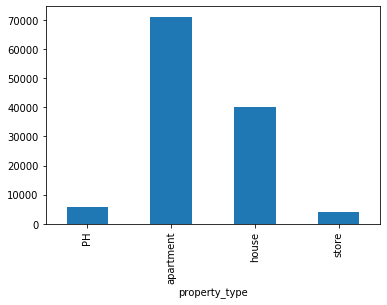

In [627]:
import matplotlib.pyplot as plt

#propertySumPlot = dataFiltrada.property_type.value_counts()
#propertySumPlot.dtypes
plt.clf()
dataFiltrada.groupby('property_type').size().plot(kind='bar')
plt.show()


### -------------------------------------------------------

### CRITERIO A ESTABLECER - La propiedad tipo "house" no deberia tener valor en floor y podemos inputarle NaN o 0

In [525]:
houseMask = dataFiltrada.property_type == "house"
soloHouse = dataFiltrada.loc[houseMask, :]


In [526]:
print(soloHouse.shape)
print(soloHouse.floor.isnull().sum())
porcentajeNulosHouse = soloHouse.floor.isnull().sum() / soloHouse.shape[0]
print(porcentajeNulosHouse)
soloHouse.floor.value_counts()

(40268, 7)
39503
0.9810022846925599


1.0       385
2.0       290
3.0        18
8.0         4
7.0         4
14.0        3
32.0        2
10.0        2
22.0        2
6.0         2
135.0       2
5.0         2
313.0       2
1420.0      1
28.0        1
36.0        1
691.0       1
33.0        1
391.0       1
27.0        1
42.0        1
9.0         1
324.0       1
11.0        1
722.0       1
50.0        1
643.0       1
57.0        1
64.0        1
12.0        1
4.0         1
1512.0      1
21.0        1
41.0        1
15.0        1
1291.0      1
181.0       1
3150.0      1
82.0        1
252.0       1
343.0       1
201.0       1
25.0        1
26.0        1
77.0        1
403.0       1
136.0       1
338.0       1
2177.0      1
1450.0      1
384.0       1
56.0        1
1379.0      1
24.0        1
17.0        1
110.0       1
368.0       1
269.0       1
67.0        1
287.0       1
Name: floor, dtype: int64

Los valores de house que no corresponden a valores nulos son el 2% de los datos. Por esto podemos aplicar el criterio para house, con floor en NaN

In [529]:
soloHouse = soloHouse.assign(floor_clean=np.NaN)
soloHouse.floor_clean.value_counts()

Series([], Name: floor_clean, dtype: int64)

Ahora introduzco en dataFiltrada los valores para house con floor en NaN

In [530]:
dataFiltrada['floor_clean'] = soloHouse.floor_clean

In [533]:
dataFiltrada.loc[houseMask,:].sample()

,property_type,floor,rooms,description,title,rooms_clean,floor_clean
47641,house,NaN,3.0,"venta de casa( para reciclar) 2 dormitorios, living, cocina, garage, patio,. calle europa en b°aviador origoni, ciudad de villa mercedes pcia de san luis.(argentina ) ficha xintel web código n°4143- todos los servicios. - - echevarria maria & asoc. bienes inmuebles",casa en venta,3.0,NaN


Ahora exploramos los locales "store"

In [535]:
soloStoreMask = dataFiltrada.property_type == 'store'
soloStore = dataFiltrada.loc[soloStoreMask, :]


In [536]:
print(soloStore.shape)
print(soloStore.floor.isnull().sum())
porcentajeNulosStore = soloStore.floor.isnull().sum() / soloStore.shape[0]
print(porcentajeNulosStore)
soloStore.floor.value_counts()

(4136, 7)
4096
0.9903288201160542


1.0     24
2.0     10
19.0     1
31.0     1
53.0     1
10.0     1
14.0     1
4.0      1
Name: floor, dtype: int64

Existe un muy bajo porcentaje de valores distintos a NaN(un 1%) aplicamos el mismo criterio que para el tipo house.

In [538]:
soloStore = soloStore.assign(floor_clean=np.NaN)
soloStore.floor_clean.value_counts()
soloStore.sample()

,property_type,floor,rooms,description,title,rooms_clean,floor_clean
98915,store,NaN,NaN,"local desarrollado en planta baja. 60m2 con baño mas deposito de 60m2 en planta alta con baño ambas propiedades sobre lote de 250m2 en excelente ubicacion comercial. cercanía a accesos. ""los datos, medidas y antigüedades son estimativos y suministrados por el propietario"". código de propiedad: dlo449905horacio igarzabal cmcpsi mat nº 3154 dic propiedades s.a. -",local desarrollado en planta baja 60m2 deposito en planta alta 60m2. excelente ubicacion,NaN,NaN


Actualizo el dataframe con los valoers de locales en NaN

In [539]:
dataFiltrada['floor_clean'] = soloStore.floor_clean

Exploración de PH

In [540]:

phMask = dataFiltrada.property_type == "PH"
soloPH = dataFiltrada.loc[phMask, :]
soloPH.sample(5)

,property_type,floor,rooms,description,title,rooms_clean,floor_clean
15925,PH,NaN,3.0,"venta casa con ph al fondo.casa 3 ambientes con garaje para 1 auto y patio. living comedor (3x5), cocina (3,50x3), dormitorio al frente (3x3,50) con pisos de parquet sin placard, dormitorio contra frente con pisos de parquet sin placard, bao con receptaculo, comedor diario con techo de chapa con cuartito de lavadero. al fondo ph 3 ambientes en 2 plantas. planta baja: living comedor (6x4), cocina (3,20x4), toilette. planta alta: dormitorio principal (4x4) con balcon, 2 dormitorio (4x3,50) con balcon, bao principal con receptaculo.yerua 800, lomas del miradorconsulte cod p322miriam malizia negocios inmobiliarios espora 46, ramos mejia / .publicado por miriam malizia ngeocios inmobiliarios a traves inmomap",venta casa 3 amb con ph 3 amb al fondo lomas del mirador,3.0,NaN
59118,PH,NaN,2.0,"dos ambientes en primer piso por escalera.cocina integrada, living. dormitorio con placard y pisos parquet.baño reciclado.sin gastos!!! apto credito",dos ambientes a la calle,2.0,NaN
5900,PH,NaN,4.0,"4 amb entrada independiente primero por escalera que cuenta con living-comedor, 3 dormitorios (1 en altos), baño con bañera, cocina comedor, patio cubierto y amplia terraza.- además cuenta con parrilla y horno de barro.-","4 amb al frente con balcón, patio y terraza",4.0,NaN
39472,PH,NaN,3.0,venta de ph 3 ambientes en villa luzuriaga amplios ambientes todo en pb lavadero independiente patio de ingreso que distribuye al interior posibilidad de seguir construyendo inmejorable ubicación excelentes vías de ingreso***consulte whatsapp +54 9 11 53772762****** comercialización sujeta - a la concreción de la tramitación del coti por parte del propietario - dar acatamiento a la resolución general nº 2371 de afip - - patricia cimarelli propiedades,ph en venta,3.0,NaN
33588,PH,NaN,3.0,"ph planta baja 3 ambientes con garage al frente entrada independiente.garage de 2,80 x 5,80 placar completo de piso a techo y baulera , hall de distribución de 2,40 x 2,80, habitación principal de 3,05 x 3,10 con placar completo de piso a techo, baño con bañera completa, 2 ° habitación de 3,30 x3,00 con baulera, living-comedor de 4,40 x 4,10, que posee un sótano reves(do con cerámica en perfectas condiciones de 3,80 x 3,00, cocina de 2,10 x 2,70 completa con anafe y horno empotrable, alacenas y bajo mesadasy doble circulacion, pa(o de 2,70 x 4,20 con lavadero incorporado cubierto completo con conexión y pileta. la terraza de 102 m2 toda libre muy amplia apto para construir, con doble acceso uno por pa(o interno y otro directo de la calle. total de 90 m2 cubiertos y otros 102 m2 libres. estado general muy bueno.",vnta ph 3 ambientes liniers,3.0,NaN


In [128]:

print(soloPH.shape)
print(soloPH.floor.isnull().sum())
porcentajeNulosPH = soloPH.floor.isnull().sum() / soloPH.shape[0]
print(porcentajeNulosPH)
soloPH.floor.value_counts()
#Creo que se puede hacer un corte en 3


(5751, 6)
5178
0.9003651538862807


1.0     154
2.0     146
3.0      63
6.0      42
5.0      38
7.0      31
4.0      31
8.0      12
9.0      11
11.0     10
10.0      9
12.0      8
14.0      7
13.0      7
16.0      2
15.0      1
17.0      1
Name: floor, dtype: int64

Criterio: Se respeta el valor de floor original, en el caso de los nulos se buscan referencias al piso en la descripcion, luego decidimos en funcion de los valores encontrados.
O
Limpiamos con NaN y buscamos valores para imputar desde las descripciones?

Existen menciones de algunos locales que remarcan el piso, puede ser relevante por circulacion de gente o lugar en un shopping.

Vamos a explorar con Regex la descripcion para establecer el piso que se encuentra el local.


In [148]:
PisoUnoPattern = '1.*er+.*piso|primer+.*piso|piso+.*primero|piso+.*uno|piso+.*1'
PisoUnoRegex = re.compile(PisoUnoPattern)

In [ ]:
pisoUnoMatches = dataFiltrada.description

In [144]:
phPisoUnoMatches = soloPHNull.description.apply(lambda x: PisoUnoRegex.search(x))
phPisoUnoMatches

0                                                                                                 None
3                                                                                                 None
6         <re.Match object; span=(102, 355), match='pisos de pinotea) - living - cocina comedor - bañ>
16                                                                                                None
34        <re.Match object; span=(156, 250), match='primer piso: living, cocina, comedor diarios, dor>
                                                      ...                                             
120972     <re.Match object; span=(16, 153), match='primer piso por escalera , 5 ambientes para remod>
121081                                                                                            None
121104                                                                                            None
121130                                                                   

In [63]:
soloApartmentMask = dataFiltrada.property_type == 'apartment'
soloApartment = dataFiltrada.loc[soloApartmentMask, :]
print(soloApartment.shape)
print(soloApartment.floor.isnull().sum())
porcentajeNulosApartment = soloApartment.floor.isnull().sum() / soloApartment.shape[0]
print(porcentajeNulosApartment)
soloApartment.floor.value_counts()


(71065, 6)
64544
0.9082389361851826


1.0       1517
2.0       1096
3.0        833
4.0        625
5.0        444
          ... 
1204.0       1
407.0        1
63.0         1
1202.0       1
508.0        1
Name: floor, Length: 150, dtype: int64